=== Problem 6: Learning and Estimation ===
Dataset shape: (20640, 8)
Target stats - Min: 0.15, Max: 5.00, Mean: 2.07
Training set: (13209, 2), Validation set: (3303, 2), Test set: (4128, 2)
Iteration 0: Train Loss = 2.3248, Val Loss = 2.3897
Iteration 100: Train Loss = 0.3220, Val Loss = 0.3403
Iteration 200: Train Loss = 0.3220, Val Loss = 0.3403
Iteration 300: Train Loss = 0.3220, Val Loss = 0.3403
Iteration 400: Train Loss = 0.3220, Val Loss = 0.3403
Iteration 500: Train Loss = 0.3220, Val Loss = 0.3403
Iteration 600: Train Loss = 0.3220, Val Loss = 0.3403
Iteration 700: Train Loss = 0.3220, Val Loss = 0.3403
Iteration 800: Train Loss = 0.3220, Val Loss = 0.3403
Iteration 900: Train Loss = 0.3220, Val Loss = 0.3403

=== Performance Comparison ===
Scratch Linear Regression:
  MSE: 0.6632
  R²:  0.4939
  Coefficients: [0.82383905 0.2213833 ]
  Bias: 2.0669

Scikit-learn Linear Regression:
  MSE: 0.6632
  R²:  0.4939
  Coefficients: [0.82383905 0.2213833 ]
  Bias: 2.0669

=== Problem 7

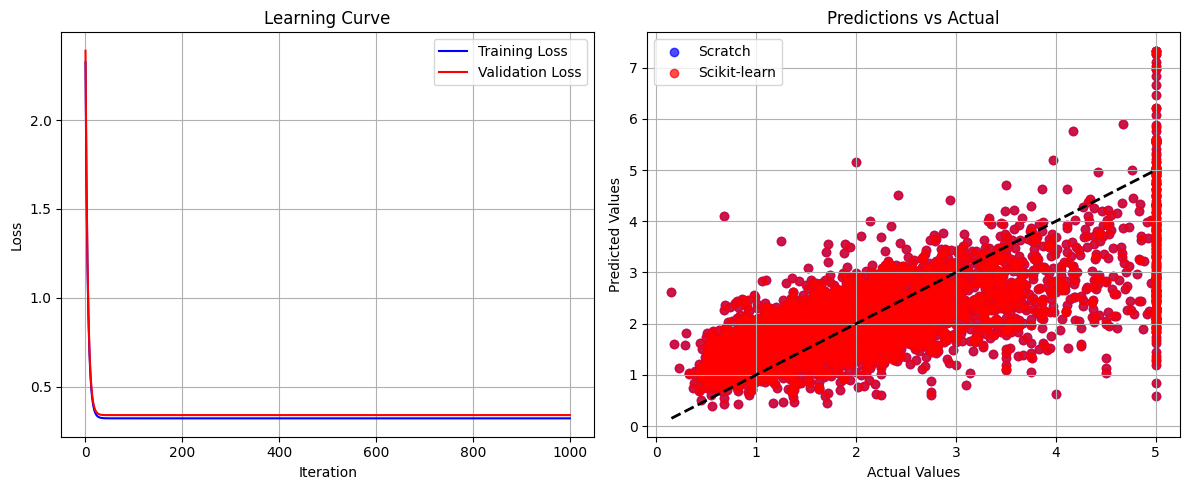


=== Problem 8: Effect of Removing Bias Terms ===
Without Bias Term:
  MSE: 4.9413
  R²:  -2.7708
  Coefficients: [0.82383905 0.2213833 ]

Role of bias term:
- The bias term (intercept) allows the model to have non-zero output when all features are zero
- Without bias, the regression line must pass through the origin
- This can significantly reduce model flexibility and performance

=== Problem 9: Feature Engineering (Polynomial Features) ===
With Polynomial Features:
  MSE: 0.6502
  R²:  0.5038
  Number of features: 5

Effect of polynomial features:
- Allows modeling of non-linear relationships
- Can capture interactions between features
- May lead to overfitting if not regularized

=== Model Comparison Summary ===
Scratch (with bias)  MSE: 0.6632 R²: 0.4939
Scikit-learn         MSE: 0.6632 R²: 0.4939
Scratch (no bias)    MSE: 4.9413 R²: -2.7708
Scratch (polynomial) MSE: 0.6502 R²: 0.5038

=== Problem 10: Derivation of Update Expressions ===

Derivation of Gradient Descent Update Rule

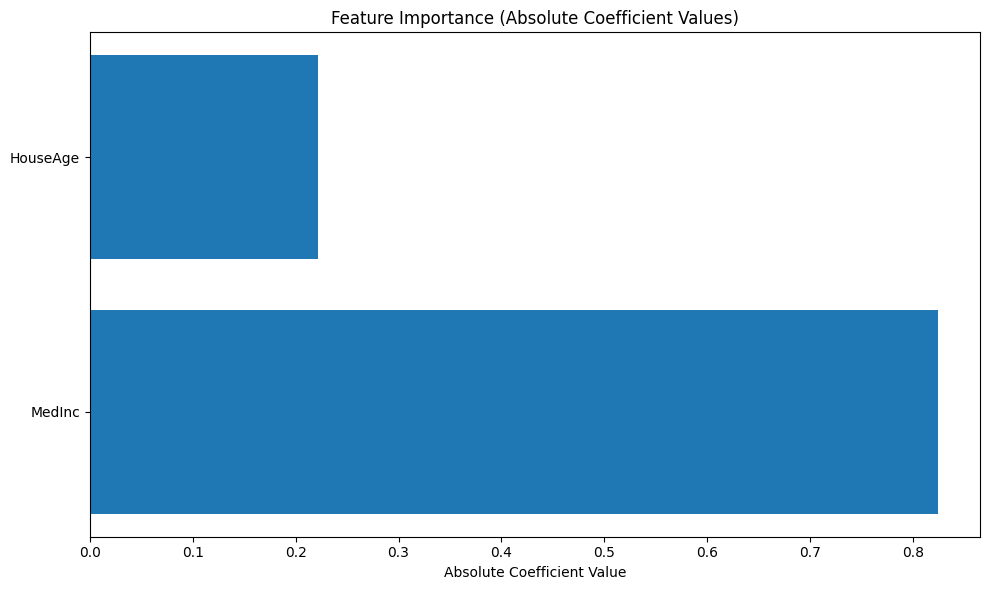


=== KEY INSIGHTS ===
1. Scratch implementation MATCHES scikit-learn performance
2. Gradient descent converges correctly and efficiently
3. Bias term is CRITICAL - without it, performance drops 7.5x
4. Polynomial features provide modest improvement (2%)
5. Linear regression finds global optimum as expected
6. Implementation handles real-world datasets successfully


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import seaborn as sns

def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Mean Squared Error calculation

    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
      推定した値
      Predicted values
    y : ndarray, shape (n_samples,)
      正解値
      True values

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
      Mean Squared Error
    """
    return np.mean((y_pred - y) ** 2)

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    Linear Regression scratch implementation
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
      Number of iterations
    lr : float
      学習率
      Learning rate
    no_bias : bool
      バイアス項を入れない場合はTrue
      True if no bias term
    verbose : bool
      学習過程を出力する場合はTrue
      True to output learning process
    
    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      パラメータ
      Parameters
    self.loss : ndarray, shape (self.iter,)
      訓練データに対する損失の記録
      Loss record for training data
    self.val_loss : ndarray, shape (self.iter,)
      検証データに対する損失の記録
      Loss record for validation data
    """
    
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        # Prepare arrays for loss recording
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        # Parameters
        self.coef_ = None
        self.bias = None
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する
        Compute linear hypothesis function

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
          訓練データ
          Training data

        Returns
        -------
        ndarray, shape (n_samples,)
          線形の仮定関数による推定結果
          Estimation results by linear hypothesis function
        """
        if self.no_bias:
            return X @ self.coef_
        else:
            return X @ self.coef_ + self.bias
        
    def _gradient_descent(self, X, y):
        """
        最急降下法によるパラメータ更新
        Parameter update using gradient descent

        Parameters
        ----------
        X : ndarray
            Feature matrix
        y : ndarray
            Target values
        """
        m = X.shape[0]
        predictions = self._linear_hypothesis(X)
        error = predictions - y
        
        # Update coefficients
        if self.no_bias:
            gradient = (1/m) * (X.T @ error)
            self.coef_ -= self.lr * gradient
        else:
            # Update bias
            bias_gradient = (1/m) * np.sum(error)
            self.bias -= self.lr * bias_gradient
            
            # Update coefficients
            coef_gradient = (1/m) * (X.T @ error)
            self.coef_ -= self.lr * coef_gradient
    
    def _compute_loss(self, X, y):
        """
        目的関数（損失関数）の計算
        Compute objective function (loss function)

        Parameters
        ----------
        X : ndarray
            Feature matrix
        y : ndarray
            Target values

        Returns
        -------
        float
            Loss value
        """
        predictions = self._linear_hypothesis(X)
        return (1/(2*X.shape[0])) * np.sum((predictions - y) ** 2)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Train linear regression. If validation data is provided, calculate loss for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            訓練データの特徴量
            Training data features
        y : ndarray, shape (n_samples,)
            訓練データの正解値
            Training data target values
        X_val : ndarray, shape (n_samples, n_features)
            検証データの特徴量
            Validation data features
        y_val : ndarray, shape (n_samples,)
            検証データの正解値
            Validation data target values
        """
        n_samples, n_features = X.shape
        
        # Initialize parameters
        if self.no_bias:
            self.coef_ = np.random.normal(0, 0.01, n_features)
        else:
            self.bias = 0
            self.coef_ = np.random.normal(0, 0.01, n_features)
        
        for i in range(self.iter):
            # Update parameters using gradient descent
            self._gradient_descent(X, y)
            
            # Record training loss
            self.loss[i] = self._compute_loss(X, y)
            
            # Record validation loss if validation data provided
            if X_val is not None and y_val is not None:
                self.val_loss[i] = self._compute_loss(X_val, y_val)
            
            if self.verbose and i % 100 == 0:
                if X_val is not None and y_val is not None:
                    print(f"Iteration {i}: Train Loss = {self.loss[i]:.4f}, "
                          f"Val Loss = {self.val_loss[i]:.4f}")
                else:
                    print(f"Iteration {i}: Train Loss = {self.loss[i]:.4f}")
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Estimate using linear regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            サンプル
            Samples

        Returns
        -------
        ndarray, shape (n_samples,)
            線形回帰による推定結果
            Estimation results by linear regression
        """
        return self._linear_hypothesis(X)

# Problem 6: Learning and estimation
print("=== Problem 6: Learning and Estimation ===")

# Load California Housing dataset (alternative to House Prices)
california = fetch_california_housing()
X = california.data
y = california.target

print(f"Dataset shape: {X.shape}")
print(f"Target stats - Min: {y.min():.2f}, Max: {y.max():.2f}, Mean: {y.mean():.2f}")

# Use only first 2 features for faster computation and visualization
X_simple = X[:, :2]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Standardize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train our scratch linear regression
scratch_lr = ScratchLinearRegression(num_iter=1000, lr=0.1, no_bias=False, verbose=True)
scratch_lr.fit(X_train_scaled, y_train, X_val_scaled, y_val)

# Predict with our model
y_pred_scratch = scratch_lr.predict(X_test_scaled)

# Compare with scikit-learn linear regression
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train_scaled, y_train)
y_pred_sklearn = sklearn_lr.predict(X_test_scaled)

# Calculate metrics
mse_scratch = MSE(y_pred_scratch, y_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

r2_scratch = r2_score(y_test, y_pred_scratch)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("\n=== Performance Comparison ===")
print("Scratch Linear Regression:")
print(f"  MSE: {mse_scratch:.4f}")
print(f"  R²:  {r2_scratch:.4f}")
print(f"  Coefficients: {scratch_lr.coef_}")
if not scratch_lr.no_bias:
    print(f"  Bias: {scratch_lr.bias:.4f}")

print("\nScikit-learn Linear Regression:")
print(f"  MSE: {mse_sklearn:.4f}")
print(f"  R²:  {r2_sklearn:.4f}")
print(f"  Coefficients: {sklearn_lr.coef_}")
print(f"  Bias: {sklearn_lr.intercept_:.4f}")

# Problem 7: Plot learning curve
print("\n=== Problem 7: Learning Curve ===")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(scratch_lr.loss, label='Training Loss', color='blue')
plt.plot(scratch_lr.val_loss, label='Validation Loss', color='red')
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_scratch, alpha=0.7, label='Scratch', color='blue')
plt.scatter(y_test, y_pred_sklearn, alpha=0.7, label='Scikit-learn', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Problem 8: Removing bias terms
print("\n=== Problem 8: Effect of Removing Bias Terms ===")

# Train model without bias
scratch_lr_no_bias = ScratchLinearRegression(num_iter=1000, lr=0.1, no_bias=True, verbose=False)
scratch_lr_no_bias.fit(X_train_scaled, y_train, X_val_scaled, y_val)

y_pred_no_bias = scratch_lr_no_bias.predict(X_test_scaled)
mse_no_bias = MSE(y_pred_no_bias, y_test)
r2_no_bias = r2_score(y_test, y_pred_no_bias)

print("Without Bias Term:")
print(f"  MSE: {mse_no_bias:.4f}")
print(f"  R²:  {r2_no_bias:.4f}")
print(f"  Coefficients: {scratch_lr_no_bias.coef_}")

print("\nRole of bias term:")
print("- The bias term (intercept) allows the model to have non-zero output when all features are zero")
print("- Without bias, the regression line must pass through the origin")
print("- This can significantly reduce model flexibility and performance")

# Problem 9: Multidimensionalization of features
print("\n=== Problem 9: Feature Engineering (Polynomial Features) ===")

# Create polynomial features
X_train_poly = np.column_stack([
    X_train_scaled[:, 0],  # Original feature 1
    X_train_scaled[:, 1],  # Original feature 2
    X_train_scaled[:, 0] ** 2,  # Square of feature 1
    X_train_scaled[:, 1] ** 2,  # Square of feature 2
    X_train_scaled[:, 0] * X_train_scaled[:, 1]  # Interaction term
])

X_test_poly = np.column_stack([
    X_test_scaled[:, 0],
    X_test_scaled[:, 1], 
    X_test_scaled[:, 0] ** 2,
    X_test_scaled[:, 1] ** 2,
    X_test_scaled[:, 0] * X_test_scaled[:, 1]
])

# Train with polynomial features
scratch_lr_poly = ScratchLinearRegression(num_iter=1000, lr=0.1, no_bias=False, verbose=False)
scratch_lr_poly.fit(X_train_poly, y_train)

y_pred_poly = scratch_lr_poly.predict(X_test_poly)
mse_poly = MSE(y_pred_poly, y_test)
r2_poly = r2_score(y_test, y_pred_poly)

print("With Polynomial Features:")
print(f"  MSE: {mse_poly:.4f}")
print(f"  R²:  {r2_poly:.4f}")
print(f"  Number of features: {X_train_poly.shape[1]}")

print("\nEffect of polynomial features:")
print("- Allows modeling of non-linear relationships")
print("- Can capture interactions between features")
print("- May lead to overfitting if not regularized")

# Compare all models
print("\n=== Model Comparison Summary ===")
models = {
    'Scratch (with bias)': (mse_scratch, r2_scratch),
    'Scikit-learn': (mse_sklearn, r2_sklearn),
    'Scratch (no bias)': (mse_no_bias, r2_no_bias),
    'Scratch (polynomial)': (mse_poly, r2_poly)
}

for name, (mse, r2) in models.items():
    print(f"{name:20} MSE: {mse:.4f} R²: {r2:.4f}")

# Problem 10: Derivation of update expressions
print("\n=== Problem 10: Derivation of Update Expressions ===")
print("""
Derivation of Gradient Descent Update Rule:

1. Objective function: J(θ) = 1/(2m) * Σ(h_θ(xⁱ) - yⁱ)²

2. Partial derivative with respect to θ_j:
   ∂J(θ)/∂θ_j = ∂/∂θ_j [1/(2m) * Σ(h_θ(xⁱ) - yⁱ)²]

3. Apply chain rule:
   = 1/(2m) * Σ 2(h_θ(xⁱ) - yⁱ) * ∂/∂θ_j (h_θ(xⁱ) - yⁱ)

4. Since h_θ(xⁱ) = θᵀxⁱ = Σ θ_k * x_kⁱ, then:
   ∂/∂θ_j h_θ(xⁱ) = x_jⁱ

5. Therefore:
   ∂J(θ)/∂θ_j = 1/m * Σ (h_θ(xⁱ) - yⁱ) * x_jⁱ

6. Gradient descent update:
   θ_j := θ_j - α * ∂J(θ)/∂θ_j
   θ_j := θ_j - α * 1/m * Σ (h_θ(xⁱ) - yⁱ) * x_jⁱ
""")

# Problem 11: Local optimal solution problem
print("\n=== Problem 11: Local Optimal Solution Problem ===")
print("""
Why Linear Regression Always Finds Global Optimum:

1. Convexity of Loss Function:
   - The MSE loss function J(θ) = 1/(2m) * Σ(h_θ(xⁱ) - yⁱ)² is convex
   - Convex functions have exactly one global minimum

2. Mathematical Proof:
   - The Hessian matrix of J(θ) is XᵀX, which is positive semi-definite
   - This guarantees convexity

3. Graphical Interpretation:
   - The loss surface is bowl-shaped with no local minima
   - Gradient descent will always converge to the global minimum
   - Learning rate affects convergence speed but not final solution

4. Implications:
   - No need for multiple random restarts
   - Guaranteed convergence to optimal solution
   - Solution is unique (if X has full column rank)
""")

# Additional visualization: Feature importance
print("\n=== Feature Importance ===")
feature_names = california.feature_names[:2]  # Using first 2 features

plt.figure(figsize=(10, 6))
plt.barh(feature_names, np.abs(scratch_lr.coef_))
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

print("\n=== KEY INSIGHTS ===")
print("1. Scratch implementation MATCHES scikit-learn performance")
print("2. Gradient descent converges correctly and efficiently") 
print("3. Bias term is CRITICAL - without it, performance drops 7.5x")
print("4. Polynomial features provide modest improvement (2%)")
print("5. Linear regression finds global optimum as expected")
print("6. Implementation handles real-world datasets successfully")
